## Notebook Pauline, Data Journalism - UvA
### **Welcome!** 
This notebook analyses data from the municipality of Amsterdam. It combines data from the fire department and demographic information of the municipality.

It is the first in a series of stories on the emergency services in Amsterdam. The first story will be about the fire department, followed by the police and the ambulance services. I intend to pitch it for the weekend edition of the local newspaper of Amsterdam *het Parool*. 

Data firefighters: [data.amsterdam.nl](https://https://data.amsterdam.nl/datasets/kgWquBzk2tGPJg/brandmeldingen-2010-2015/) 

Data demographics: [opendata.cbs.nl](https://https://opendata.cbs.nl/#/CBS/nl/dataset/83220NED/table) 

Read story on medium: https://paumultimedia.medium.com/amsterdam-in-safe-hands-a260bd7f8fb8


### **Table of content**

Part 1. Fire department & emergencies

Part 2. Demographics of Amsterdam

Part 3. Merging datasets

Part 4. Working with combined dataframe
1.    Type of incidents per city part
2. Explanations

  2.1 WOZ

  2.2 Population

  2.3 Age distribution

  2.4 Type of household

  2.5 Remarkable: elevator confinement in Zudioost




In [ ]:
# restart kernel/ run all 

In [87]:
#pip install cairosvg

In [88]:
#pip install bokeh

In [86]:
#pip install pygal

In [85]:
#pip install plotly

In [ ]:
from google.colab import drive
drive.mount('/mnt', force_remount=True)

Mounted at /mnt


In [ ]:
import pandas as pd
from pprint import pprint
import json
from collections import Counter
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import bokeh
import pygal
%matplotlib inline

# **Part 1**: fire department & emergencies

In part 1 the data of the fire department is downloaded, cleaned and some basic analyses are done. While analyzing the data, I looked for elements that stand out and can play a role in my story. 

In [ ]:
brandweermelding = pd.read_csv('/mnt/My Drive/datajournalism/brwaa_2010-2015.csv', sep=";")

In [ ]:
#take out the spaces
brand = brandweermelding
brand['buurt']=brand['buurt'].str.replace(' ','')

brand2 = brand
brand2['wijk']=brand2['wijk'].str.replace(' ','')

brand3 = brand2
brand3['incident_type']=brand3['incident_type'].str.strip()

brand4 = brand3
brand4['dag_naam']=brand4['dag_naam'].str.strip()

bw = brand4
bw['dagdeel']=bw['dagdeel'].str.strip()
bw

,incident_id,start_tijd,incident_type,landelijke_meldingsclassificatie_niveau1,landelijke_meldingsclassificatie_niveau2,landelijke_meldingsclassificatie_niveau3,datum,jaar,maand_nr,maand_naam,dag_nr,dag_naam,week_nr,kwartaal,prioriteit,uur,dagdeel,objecttype,objectfunctie,buurt,wijk,woonplaats,gemeente
0,84149,2009/12/07 20:01:50.000000000,Meten / overlast / verontreiniging,Dienstverlening,Burger Dienst,Stankoverlast Burger,2009/12/07 00:00:00.000000000,2009,12,December ...,7,Dinsdag,50,4,2,20,Avond,bag ...,Woonfunctie ...,Kinkerbuurt,StadsdeelWest,Amsterdam ...,Amsterdam ...
1,45831,2012/10/13 22:05:10.000000000,Buitenbrand,Brand,Wegvervoer,,2012/10/13 00:00:00.000000000,2012,10,Oktober ...,13,Zondag,41,4,1,22,Avond,weg ...,Straat ...,Buikslotermeer,StadsdeelNoord,...,Amsterdam ...
2,139962,2006/02/18 15:29:15.000000000,Brandgerucht / nacontrole,Brand,kleine inzet Brand,Nacontrole kl.inzet,2006/02/18 00:00:00.000000000,2006,2,Februari ...,18,Zondag,7,1,1,15,Middag,...,...,,,...,Haarlemmermeer ...
3,53505,2012/04/15 20:09:03.000000000,Dier te water,Dienstverlening,Dieren,Te water,2012/04/15 00:00:00.000000000,2012,4,April ...,15,Maandag,15,2,3,20,Avond,water ...,Kanalen en rivieren ...,Buitenveldert-Oost,StadsdeelZuid,...,Amsterdam ...
4,48323,2012/08/17 03:27:55.000000000,Buitenbrand,Brand,Wegvervoer,,2012/08/17 00:00:00.000000000,2012,8,Augustus ...,17,Zaterdag,33,3,1,3,Nacht,weg ...,Straat ...,Hoofddorppleinbuurt,StadsdeelZuid,...,Amsterdam ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127860,52927,2012/05/02 15:53:13.000000000,Meten / overlast / verontreiniging,Dienstverlening,Brandweer,Meting,2012/05/02 00:00:00.000000000,2012,5,Mei ...,2,Donderdag,18,2,1,15,Middag,bag ...,Bijeenkomstfunctie ...,DeWeteringschans,StadsdeelCentrum,Amsterdam ...,Amsterdam ...
127861,95309,2009/01/21 00:18:20.000000000,Buitenbrand,Brand,Voertuig brand,Auto brand,2009/01/21 00:00:00.000000000,2009,1,Januari ...,21,Donderdag,4,1,1,0,Nacht,weg ...,Straat ...,Slotermeer-Noordoost,StadsdeelNieuw-West,...,Amsterdam ...
127862,47538,2012/09/04 07:41:02.000000000,OMS / automatische melding,Alarm,Autom. brand,,2012/09/04 00:00:00.000000000,2012,9,September ...,4,Woensdag,36,3,1,7,Ochtend,bag ...,Woonfunctie ...,KeizerKarelpark-West,Wijk00Amstelveen,Amstelveen ...,Amstelveen ...
127863,82352,2010/01/15 16:15:33.000000000,OMS / automatische melding,Brand,Aut.Alarm brand,.OMS melding brand,2010/01/15 00:00:00.000000000,2010,1,Januari ...,15,Zaterdag,2,1,1,16,Middag,bag ...,Woonfunctie ...,Vondelbuurt,StadsdeelWest,Amsterdam ...,Amsterdam ...


In [ ]:
# drop columns 
bw.drop(['incident_id','start_tijd','datum','maand_naam','week_nr','kwartaal','objecttype','objectfunctie','woonplaats','gemeente'],axis=1,inplace=True)

In [ ]:
# rename columns
bw.columns = ['incident type','niv1','niv2','niv3','year','month','day','day name','priority','hour','daypart','neighborhood','city part']

In [ ]:
# put spaces where necessary 
bw['city part'] = bw['city part'].str.replace(r"(\w)([A-Z])", r"\1 \2",)
bw

,incident type,niv1,niv2,niv3,year,month,day,day name,priority,hour,daypart,neighborhood,city part
0,Meten / overlast / verontreiniging,Dienstverlening,Burger Dienst,Stankoverlast Burger,2009,12,7,Dinsdag,2,20,Avond,Kinkerbuurt,Stadsdeel West
1,Buitenbrand,Brand,Wegvervoer,,2012,10,13,Zondag,1,22,Avond,Buikslotermeer,Stadsdeel Noord
2,Brandgerucht / nacontrole,Brand,kleine inzet Brand,Nacontrole kl.inzet,2006,2,18,Zondag,1,15,Middag,,
3,Dier te water,Dienstverlening,Dieren,Te water,2012,4,15,Maandag,3,20,Avond,Buitenveldert-Oost,Stadsdeel Zuid
4,Buitenbrand,Brand,Wegvervoer,,2012,8,17,Zaterdag,1,3,Nacht,Hoofddorppleinbuurt,Stadsdeel Zuid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127860,Meten / overlast / verontreiniging,Dienstverlening,Brandweer,Meting,2012,5,2,Donderdag,1,15,Middag,DeWeteringschans,Stadsdeel Centrum
127861,Buitenbrand,Brand,Voertuig brand,Auto brand,2009,1,21,Donderdag,1,0,Nacht,Slotermeer-Noordoost,Stadsdeel Nieuw-West
127862,OMS / automatische melding,Alarm,Autom. brand,,2012,9,4,Woensdag,1,7,Ochtend,KeizerKarelpark-West,Wijk00 Amstelveen
127863,OMS / automatische melding,Brand,Aut.Alarm brand,.OMS melding brand,2010,1,15,Zaterdag,1,16,Middag,Vondelbuurt,Stadsdeel West


### **Basic analysis** to get better understanding of first dataset - **over the years**

The dataset contains a lot of potentially relevant data. In the next section I conducted some basic analysis to get a better understanding of the information that is available. I did a value count to get impression how often fire brigade Amsterdam came in action. Interesting to see that, based on this dataset, fire brigade is called around 11.000 times and some years hardly differ. In 2006 and 2007 most emergencies calls. 

Note: the dataset was supposed to contain data from 2010-2015, however the value count shows that it ranges from 2005-2015. 

In [ ]:
# year and number of incidents
bw.value_counts('year').sort_index()

year
2005     9370
2006    14069
2007    15208
2008    12221
2009    12094
2010    11913
2011    11427
2012    11499
2013    11851
2014    12846
2015     5367
dtype: int64

In [ ]:
# most incidents happen during winter and summer month(december, january, july and may)
bw.value_counts('month')

month
1     13018
12    12809
7     11225
5     11112
10    10491
6     10381
4     10334
11    10245
8      9795
3      9792
9      9756
2      8907
dtype: int64

In [ ]:
# data of 2015 is not complete, also 2 months of 2005 are missing
vijftien = bw[bw['year'] == 2015]
vijftien.value_counts('month')

month
1    1364
3    1220
4    1068
2    1001
5     714
dtype: int64

In [ ]:
#weekend most busy 
bw.value_counts('day name')

day name
Zaterdag     19032
Zondag       18700
Dinsdag      18478
Vrijdag      18338
Maandag      17835
Donderdag    17783
Woensdag     17699
dtype: int64

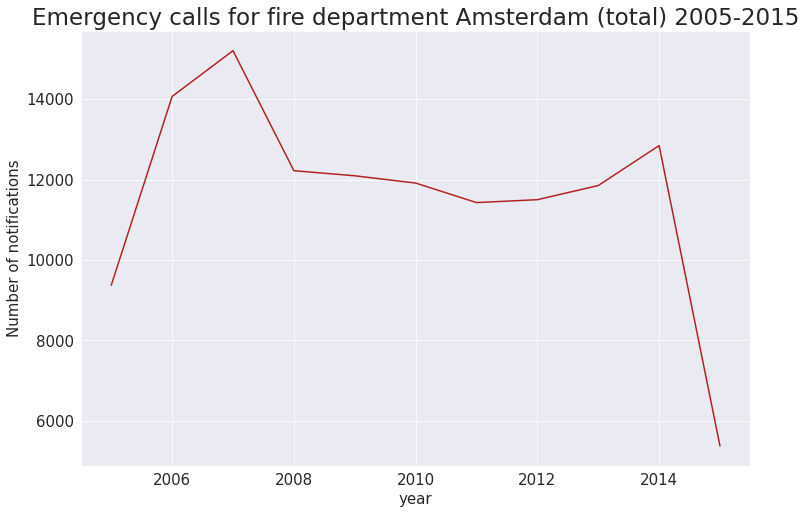

In [ ]:
# graph shows total emergency calls between 2005-2015
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.title('Emergency calls for fire department Amsterdam (total) 2005-2015', size=23) 
plt.xlabel("Year", size=15)
plt.ylabel("Number of notifications", size=15)
general = bw.value_counts('year').sort_index().plot(color='firebrick', fontsize=15)

plt.savefig('general_ams.png',dpi=400)


### **Explanation by graph in story**

*   Number of incidents slightly decline between 2005-2015
*   Peak in 2009, then decline
* Slight increase in 2014 
* Data for 2005 and 2015 incomplete



### **Basic analysis** to get better understanding of first dataset - **per city part**
Value count shows that there are many neighborhoods (168), so it will be better to analyze city parts (8). The value count city parts shows 8 parts in Amsterdam that are common and often used. It also gives several 'wijken' outside of the city, but within the reach of the Amsterdam fire brigade. I choose to exclude these wijken from the analysis, because I'm interested in the city of Amsterdam. 

In [ ]:
# value counts for neighborhood and city part
bw.value_counts('neighborhood').sort_index()
bw.value_counts('city part').sort_index()

city part
                                   7521
Stadsdeel Centrum                 14673
Stadsdeel Nieuw-West              15570
Stadsdeel Noord                   11274
Stadsdeel Oost                    14315
Stadsdeel West                    15048
Stadsdeel Westpoort                2549
Stadsdeel Zuid                    16837
Stadsdeel Zuidoost                11368
Wijk00                             1657
Wijk00 Aalsmeer                    1202
Wijk00 Amstelveen                  9850
Wijk00 Diemen-Zuid                  985
Wijk01 Diemen-Centrum              1299
Wijk01 Kudelstraaten Kalslagen      384
Wijk02 Diemen-Noord                 497
Wijk02 Oosteinde                    551
Wijk15 Dorpscentrum                 222
Wijk25 Thamerdal                    227
Wijk35 Zijdelwaard                  670
Wijk45 Legmeer                      355
Wijk50 Langsde Vuurlinie             38
Wijk55 Veilinggebied                162
Wijk65 Meerwijk                     244
Wijk75 Bedrijventerrein       

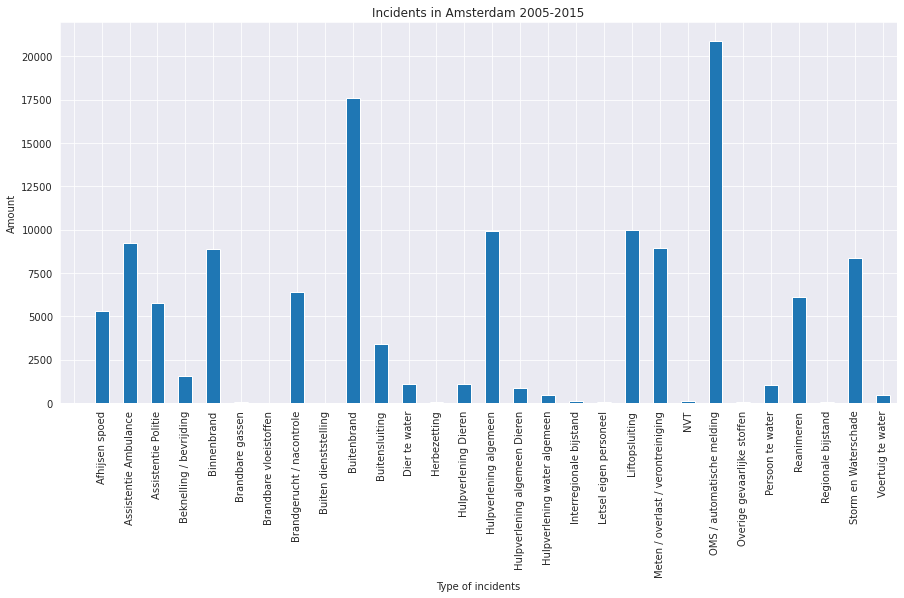

In [ ]:
# graph shows which incidents happen most 
bar_incident = bw['incident type'].value_counts().sort_index().plot(kind='bar', figsize=[15,7], title='Incidents in Amsterdam 2005-2015', xlabel='Type of incidents', ylabel='Amount', fontsize=10)
#rot=55
#plt.tight_layout()
#plt.savefig('incident_amsterdam.png',dpi=400)

# Note: I tried to use SNS but it was less clean/ more chaotic. 
#bar_inc = sns.countplot(x = 'incident type', data=bw, color = 'blue')
#plt.xticks(rotation=45)


The static graph above contains a lot of information. It could be nice to make an interactive graph so that you can hoover over it and see how often a particular incident happens. See below the interactive version using pygal. 

In [ ]:
value = bw['incident type'].value_counts().sort_index() 

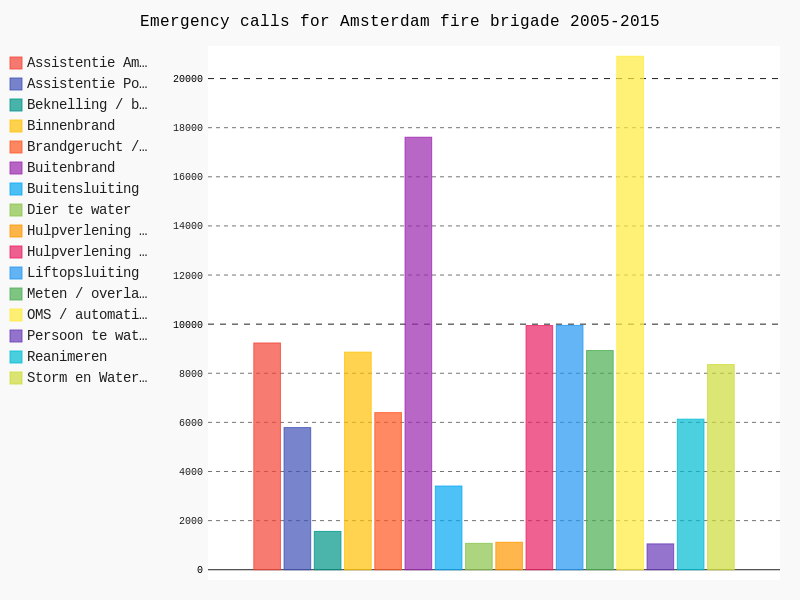

In [ ]:
# Make the bar chart above interactive with pygal 
bar_int = pygal.Bar() 
bar_int.title = 'Emergency calls for Amsterdam fire brigade 2005-2015'
# Note: I took out values under 1000, because otherwise its too much information

bar_int.add('Assistentie Ambulance', value['Assistentie Ambulance'])
bar_int.add('Assistentie Politie', value['Assistentie Politie'])
bar_int.add('Beknelling / bevrijding', value['Beknelling / bevrijding'])
bar_int.add('Binnenbrand', value['Binnenbrand'])
bar_int.add('Brandgerucht / nacontrole', value['Brandgerucht / nacontrole'])
bar_int.add('Buitenbrand', value['Buitenbrand'])
bar_int.add('Buitensluiting', value['Buitensluiting'])
bar_int.add('Dier te water', value['Dier te water'])
bar_int.add('Hulpverlening Dieren', value['Hulpverlening Dieren'])
bar_int.add('Hulpverlening algemeen', value['Hulpverlening algemeen'])
bar_int.add('Liftopsluiting', value['Liftopsluiting'])  
bar_int.add('Meten / overlast / verontreiniging', value['Meten / overlast / verontreiniging'])  
bar_int.add('OMS / automatische melding', value['OMS / automatische melding'])  
bar_int.add('Persoon te water', value['Persoon te water'])  
bar_int.add('Reanimeren', value['Reanimeren'])              
bar_int.add('Storm en Waterschade', value['Storm en Waterschade'])


In [ ]:
# in case I want to save interactive map 
#bar_int.render_sparkline()
#bar_int.render_to_file('interactive_bar_incidents.svg')

The bar chart above shows that, taken the 10 years together, the fire brigade was most often called for OMS and Buitenbrand. This is very general, and it might be more interesting to look at it in detail. Therefore, I created a line graph that shows which incidents happen most every year.

In [ ]:
# difference in emergenies from 2005-2015, only select incidents that happened more than 750 times
bw_test = bw.groupby(['year','incident type']).size().to_frame('count').reset_index()
bw_750 = bw_test[bw_test['count'] > 750]

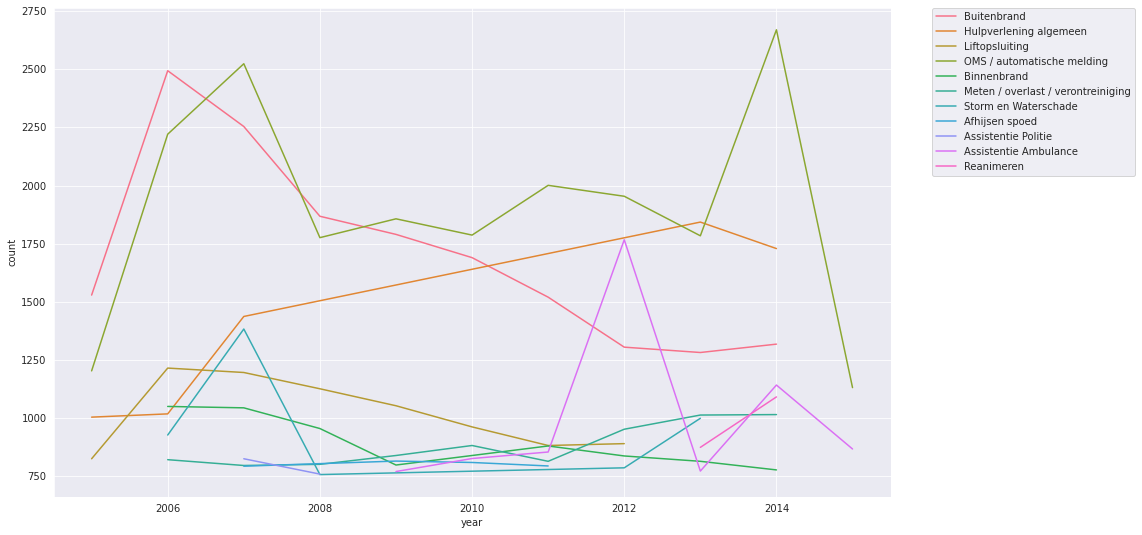

In [ ]:
# graph is still a bit weird because too messy and lines is interrupted 
plt.figure(figsize=(15,9))
sns.lineplot(x='year', y='count', data=bw_750, hue='incident type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

The graph above is too messy to use in my story, and the lines are disrupted. To make it easier to read, I select the 8 incidents that happen most and plot them in a new graph. 

In [ ]:
# show which incidents happen most often
value = bw['incident type'].value_counts().nlargest(10).sort_index() 

In [ ]:
# try query with top 8 (top 10 is too many lines) 
#top10: que = bw_test[(bw_test['incident type'] == 'Binnenbrand') | (bw_test['incident type']== 'OMS / automatische melding') | (bw_test['incident type']== 'Storm en Waterschade') | (bw_test['incident type']== 'Liftopsluiting') | (bw_test['incident type']== 'Assistentie Ambulance') | (bw_test['incident type']== 'Meten / overlast / verontreiniging') | (bw_test['incident type']== 'Brandgerucht / nacontrole') | (bw_test['incident type']== 'Buitenbrand') | (bw_test['incident type']== 'Hulpverlening algemeen') | (bw_test['incident type']== 'Reanimeren')]
que = bw_test[(bw_test['incident type'] == 'Binnenbrand') | (bw_test['incident type']== 'OMS / automatische melding') | (bw_test['incident type']== 'Storm en Waterschade') | (bw_test['incident type']== 'Liftopsluiting') | (bw_test['incident type']== 'Assistentie Ambulance') | (bw_test['incident type']== 'Meten / overlast / verontreiniging') | (bw_test['incident type']== 'Buitenbrand') | (bw_test['incident type']== 'Hulpverlening algemeen')]

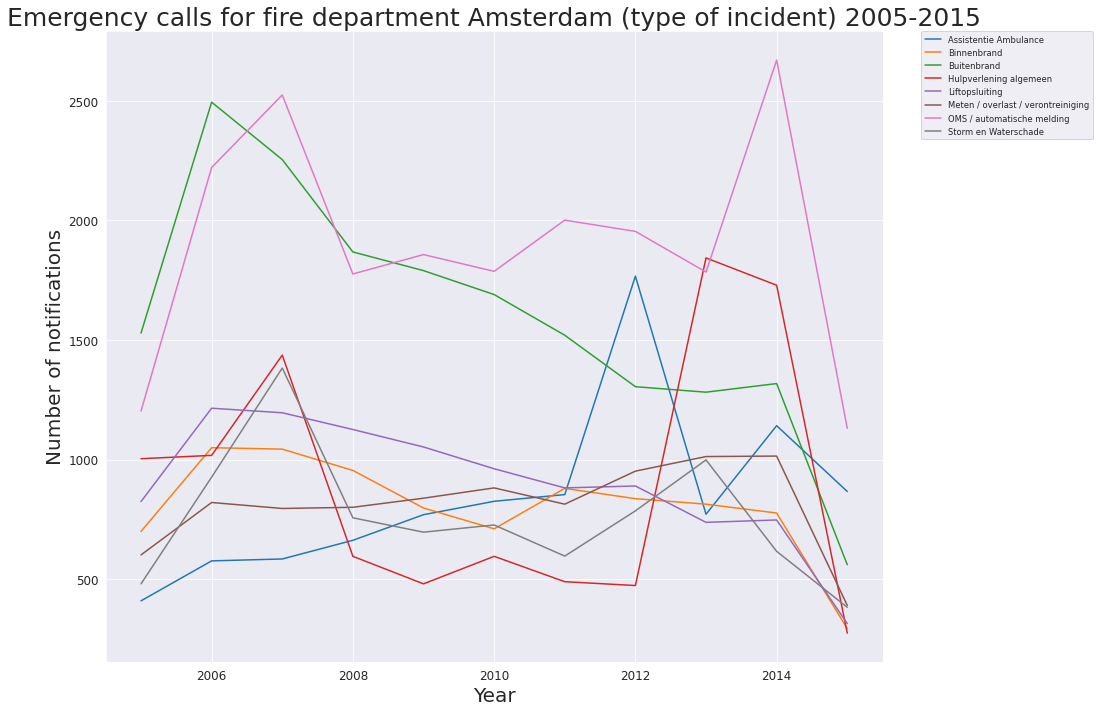

In [ ]:
# graph shows the 8 incidents that happened most over the years

sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
line = sns.lineplot(x='year', y='count', data=que, hue='incident type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize = 'small')
#line.set_title('Most frequent fire department related incidents in Amsterdam 2005-2015')
line.axes.set_title("Emergency calls for fire department Amsterdam (type of incident) 2005-2015",fontsize=25)
line.set_xlabel("Year",fontsize=20)
line.set_ylabel("Number of notifications",fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
#plt.savefig('line_amsterdam.png',dpi=400)


### **Explanation by graph in story**
* Use line graph to show fluctuation of incident types over the years
* Outside fire is steadily in decline
* OMS highest 
* Assistence general and assistence ambulance in 2014 --> help to other emergency services?


In the story I can go more into depth what the different types of incidents mean. I can use the info from the columns niv1, 2 and 3 in the dataset. 

Niv 1,2,3 show more information about the type of incident.

- **OMS**: Public Notification System, sends an automatic response to control room. The control room personal will judge whether action is required. The OMS is often used for burglar or fire alarm. It shows notification that the fire brigade had to respond to, but also calls that did not require action (such as Br Criterium OMS). Niv 3 specifies what kind of notification was given, for example sprinkler system, burglar alarm, over the telephone, or test or false alarm. 

- **Buitenbrand**:  can be related to fire, rail transport, traffic. More in detail it can concern outside fires, vehicles, and shipping. Note that is it sometimes confusing how the categories are organized. Outside fire has sub-categories 'fire', 'outside' and 'outside fire', and the difference is unclear. Least often the fire fighters have to help with a fire in nature or deconstruction of a bomb, probably because there are other services for that. 

- **Hulpverlening algemeen**: Niv 1 shows that majority of notifications is for services, accident, or traffic. Niv 3 shows that most is 'to a third party',  working at hight, and cleaning road surface.

In [ ]:
# analyze niv 1,2,3

#OMS = bw[bw['incident type'] == 'OMS / automatische melding']
#columns_OMS = ['incident type', 'niv1', 'niv2', 'niv3']
#OMS[columns_OMS]
#OMS.value_counts('niv3').sort_index()

Buiten = bw[bw['incident type'] == 'Buitenbrand']
columns_buiten = ['incident type', 'niv1', 'niv2', 'niv3']
Buiten[columns_buiten]
Buiten.value_counts('niv2')

#hulp = bw[bw['incident type'] == 'Hulpverlening algemeen']
#columns_hulp = ['incident type', 'niv1', 'niv2', 'niv3']
#hulp[columns_hulp]
#hulp.value_counts('niv3')

niv2
Buitenbrand              brand    10453
Buiten                             2976
Voertuig                 brand     2691
Wegvervoer                         1059
Scheepvaart              brand      122
Scheepvaart                          80
Spoorvervoer             brand       58
Bijgebouw                            51
Brand                                35
Luchtvaart               Brand       30
Spoorvervoer                         25
Autosnelwegen                        12
Natuur                               10
TIS 2 Brand                           8
Bom                                   1
dtype: int64

# **Part 2**: demography of Amsterdam

In part 2, I analyse the demographic data of the municipality of Amsterdam. There is information available about age distribution, households, WOZ-waarde, income, population density etc. 

In [ ]:
demography = pd.read_csv('/mnt/My Drive/datajournalism/Kerncijferstotaal.csv', sep=";")

In [ ]:
# make it ready to merge
dm = demography
dm['Wijken en buurten']=dm['Wijken en buurten'].str.replace(' ','')
dm

,Wijken en buurten,Bevolking/Aantal inwoners (aantal),Bevolking/Leeftijdsgroepen/0 tot 15 jaar (aantal),Bevolking/Leeftijdsgroepen/15 tot 25 jaar (aantal),Bevolking/Leeftijdsgroepen/25 tot 45 jaar (aantal),Bevolking/Leeftijdsgroepen/45 tot 65 jaar (aantal),Bevolking/Leeftijdsgroepen/65 jaar of ouder (aantal),Bevolking/Particuliere huishoudens/Huishoudens totaal (aantal),Bevolking/Particuliere huishoudens/Eenpersoonshuishoudens (aantal),Bevolking/Particuliere huishoudens/Huishoudens zonder kinderen (aantal),Bevolking/Particuliere huishoudens/Huishoudens met kinderen (aantal),Wonen/Gemiddelde woningwaarde (x 1 000 euro),Wonen/Woningen naar bouwjaar/Bouwjaar voor 2000 (%),Wonen/Woningen naar bouwjaar/Bouwjaar vanaf 2000 (%),Inkomen/Inkomen van personen/Gemiddeld inkomen per inwoner (x 1 000 euro)
0,Amsterdam,821752,127467,106422,288230,202117,97516,449209,247417,90851,110941,232,88,12,26.9
1,StadsdeelCentrum,86360,8395,10480,31930,24285,11280,55915,36505,11500,7920,319,93,7,35.8
2,Burgwallen-OudeZijde,4250,255,730,1975,960,345,3075,2200,625,255,271,97,3,30.1
3,Burgwallen-NieuweZijde,4535,250,725,2375,870,320,3200,2325,690,195,279,99,1,35.9
4,Grachtengordel-West,7060,650,900,2455,1975,1085,4605,2945,1095,570,498,99,1,52.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,"Bijlmer-Oost(E,G,K)",26755,4960,3850,7630,7410,2905,13935,7445,2090,4405,144,80,20,18.7
102,Nellestein,3000,395,250,915,840,610,1735,995,395,355,131,100,0,27.1
103,Holendrecht/Reigersbos,18250,3385,2480,4715,5145,2530,9010,4305,1505,3210,143,100,0,18.5
104,Gein,11550,1915,1485,3115,3845,1200,5490,2350,1060,2085,161,100,0,21.5


In [ ]:
#rename columns pop = population density per km²
dm.columns = ['neighborhood','population','amount 0-15y','amount 15-25','amount 25-45','amount 45-65','amount 65+','households total (amount)','household oneperson','household nokids','household kids','WOZ','Before_2000','After_2000','Income average']

In [ ]:
# drop columns
# dm.drop(['Before_2000', 'After_2000'],axis=1,inplace=True)

I've used this dataset to get an impression of the data I can use. For example, it might be interesting to look at WOZ-value, age distribution or type of households in a particular city part, and see if there is a correlation with the type of incident that happens. 

# **Part 3**: Merging datasets 

In part 3, I merge the two datasets. Demography data is organized by neighborhood, fire brigade data is organized by both neighborhood and city part. Merging is possible because both datasets mention neighborhoods. The dataset demography has 105 neighborhoods and fire brigade 168, so it is safe to say that all neighborhoods are covered in the merging process and will be linked to a city part. 

In [ ]:
# merging of the two datasets
df = pd.merge(bw, dm, how='inner', left_on='neighborhood', right_on='neighborhood')

In [ ]:
# add spaces
df['neighborhood'] = df['neighborhood'].str.replace(r"(\w)([A-Z])", r"\1 \2",)
df

,incident type,niv1,niv2,niv3,year,month,day,day name,priority,hour,daypart,neighborhood,city part,population,amount 0-15y,amount 15-25,amount 25-45,amount 45-65,amount 65+,households total (amount),household oneperson,household nokids,household kids,WOZ,Before_2000,After_2000,Income average
0,Meten / overlast / verontreiniging,Dienstverlening,Burger Dienst,Stankoverlast Burger,2009,12,7,Dinsdag,2,20,Avond,Kinkerbuurt,Stadsdeel West,6195,610,735,2940,1480,440,4240,2955,730,565,214,98,2,26.5
1,Meten / overlast / verontreiniging,Dienstverlening,Onderzoek dienstverl,Metingen onderz,2010,1,18,Dinsdag,1,15,Middag,Kinkerbuurt,Stadsdeel West,6195,610,735,2940,1480,440,4240,2955,730,565,214,98,2,26.5
2,Storm en Waterschade,Leefmilieu,Water/weer problemen,Wateroverlast,2013,8,30,Zaterdag,3,17,Middag,Kinkerbuurt,Stadsdeel West,6195,610,735,2940,1480,440,4240,2955,730,565,214,98,2,26.5
3,Reanimeren,Gezondheid,CPA gezondheid,AED Reanimatie CPA,2009,3,27,Zaterdag,1,19,Avond,Kinkerbuurt,Stadsdeel West,6195,610,735,2940,1480,440,4240,2955,730,565,214,98,2,26.5
4,Hulpverlening algemeen,Dienstverlening,Algemeen dienst,Werken op hoogte Algem,2007,7,6,Zaterdag,3,12,Middag,Kinkerbuurt,Stadsdeel West,6195,610,735,2940,1480,440,4240,2955,730,565,214,98,2,26.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101629,Buitenbrand,Brand,Buitenbrand brand,Overig buitbr,2010,4,12,Dinsdag,1,23,Avond,Nieuwendammerdijk/Buiksloterdijk,Stadsdeel Noord,1700,420,145,340,560,245,655,170,185,305,385,95,5,34.1
101630,Buitenbrand,Brand,Buitenbrand brand,Overig buitbr,2011,1,16,Maandag,1,17,Middag,Nieuwendammerdijk/Buiksloterdijk,Stadsdeel Noord,1700,420,145,340,560,245,655,170,185,305,385,95,5,34.1
101631,Meten / overlast / verontreiniging,Dienstverlening,Onderzoek dienstverl,Metingen onderz,2010,4,5,Dinsdag,1,14,Middag,Nieuwendammerdijk/Buiksloterdijk,Stadsdeel Noord,1700,420,145,340,560,245,655,170,185,305,385,95,5,34.1
101632,Meten / overlast / verontreiniging,Dienstverlening,Brandweer,Meting,2014,3,8,Zondag,1,9,Ochtend,Nieuwendammerdijk/Buiksloterdijk,Stadsdeel Noord,1700,420,145,340,560,245,655,170,185,305,385,95,5,34.1


In [ ]:
# check what type the variables are
#df.dtypes

In [ ]:
# in case I want to save dataset as CSV
#df.to_csv('dataprojectDJ.csv')

# **Part 4**: Working with combined dataframe 

In part 4, I look for possible angles to my story and potential explanations for my findings. Here you can find visualizations that are presented in my story. 

## **4.1 Type of incident** per city part 

What type of incidents happen in what part of the city? And how can it be explained? 

In [ ]:
# new df with city part and incident type 
plt.rcParams['figure.figsize'] = (20.0, 5.0)
dft = df.groupby(['city part','incident type']).size().to_frame('count').reset_index()
#dft.to_csv('incident_city.csv')

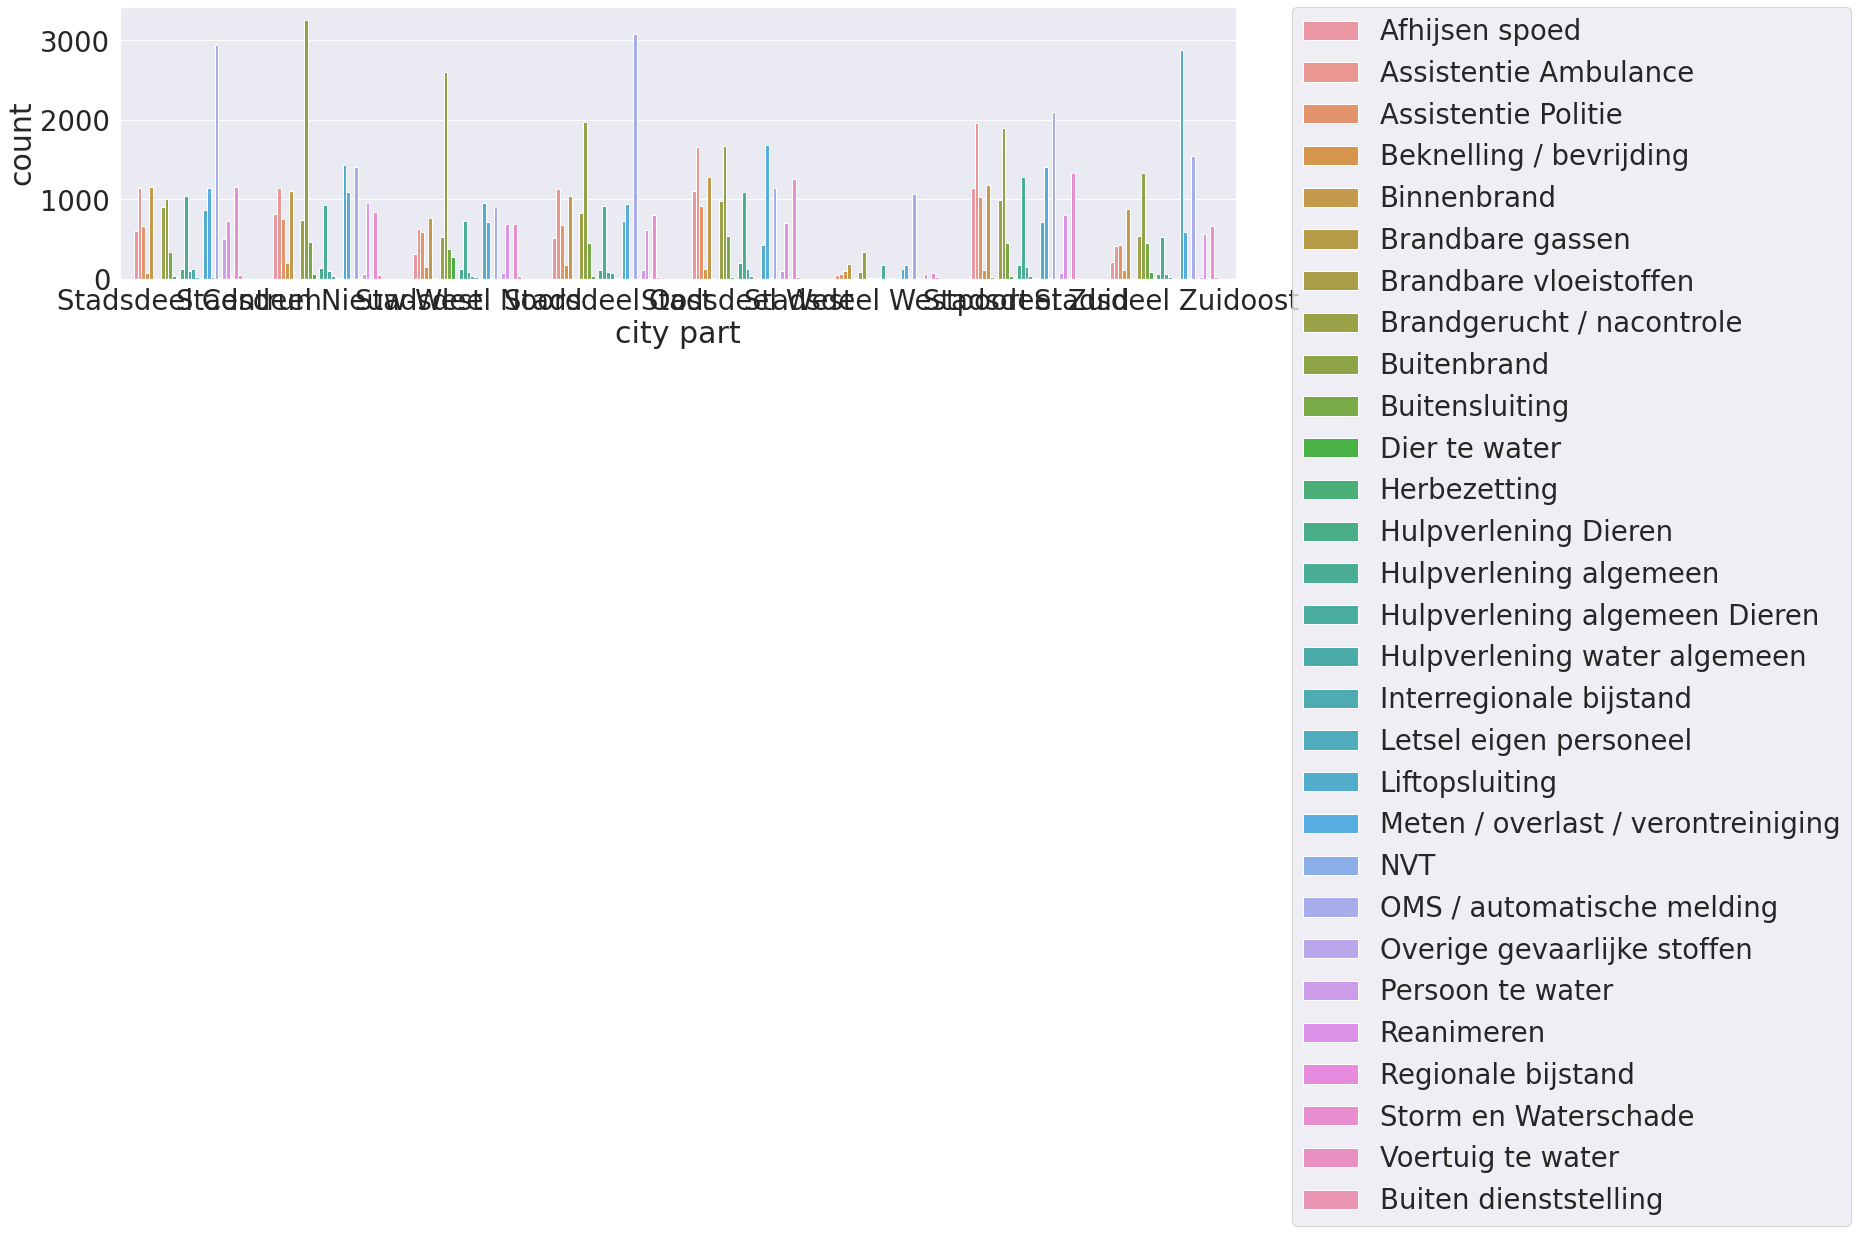

In [ ]:
#plot the info 
#plt.figure(figsize=(40,20))
sns.set(font_scale=2.5) 
sns.barplot(x='city part', y ='count', hue = 'incident type', data = dft)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

The graph above is very messy because too many incident types are mentioned. Below I selected the top-3 incidents per city part. 

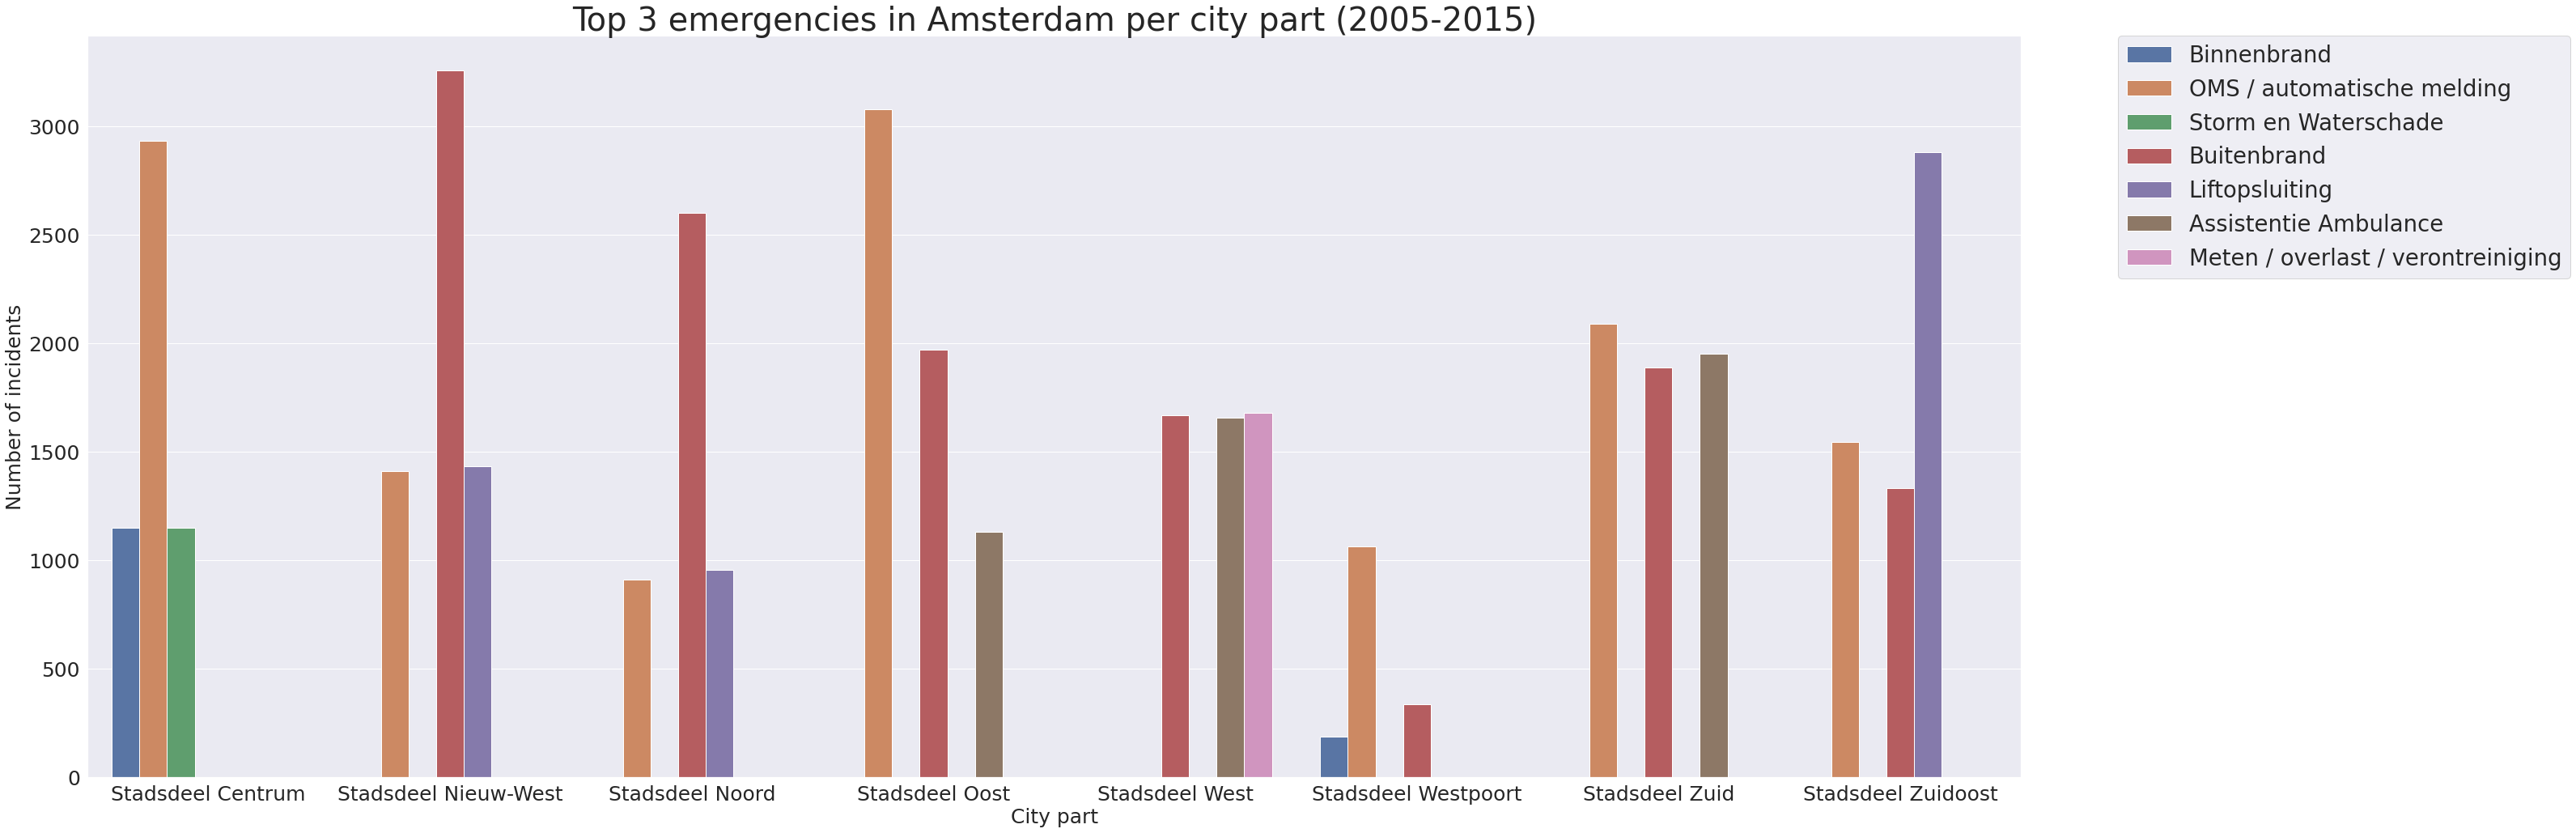

In [ ]:
# plot the top-3 incidents per city part 
plt.figure(figsize=(45,15))
sns.set(font_scale=2.5) 
idx = dft.groupby('city part')['count'].nlargest(3).reset_index()
dft = dft.merge(idx, on=['city part', 'count'], how ='inner')
city = sns.barplot(x='city part', y ='count', hue = 'incident type', data = dft)
city.axes.set_title("Top 3 emergencies in Amsterdam per city part (2005-2015)",fontsize=40)
city.set_xlabel("City part",fontsize=25)
city.set_ylabel("Number of incidents",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

plt.savefig('incident_part.png')


This graph doesn't show exactly what I want because OMS and Buitenbrand are mentioned everywhere. I want to focus on specific differences and thus drop these two values. I will mention this is my story. 

In [ ]:
# create dataframe with top 5
vijf = df.groupby(['city part','incident type']).size().to_frame('count').reset_index()
vijf
zes = vijf.groupby('city part')['count'].nlargest(5).reset_index()
zes = zes.merge(vijf, on=['city part', 'count'], how ='inner')

In [ ]:
# drop OMS and buitenbrand
zes.drop(zes.loc[zes['incident type']=='OMS / automatische melding'].index, inplace=True)
zes.drop(zes.loc[zes['incident type']=='Buitenbrand'].index, inplace=True)

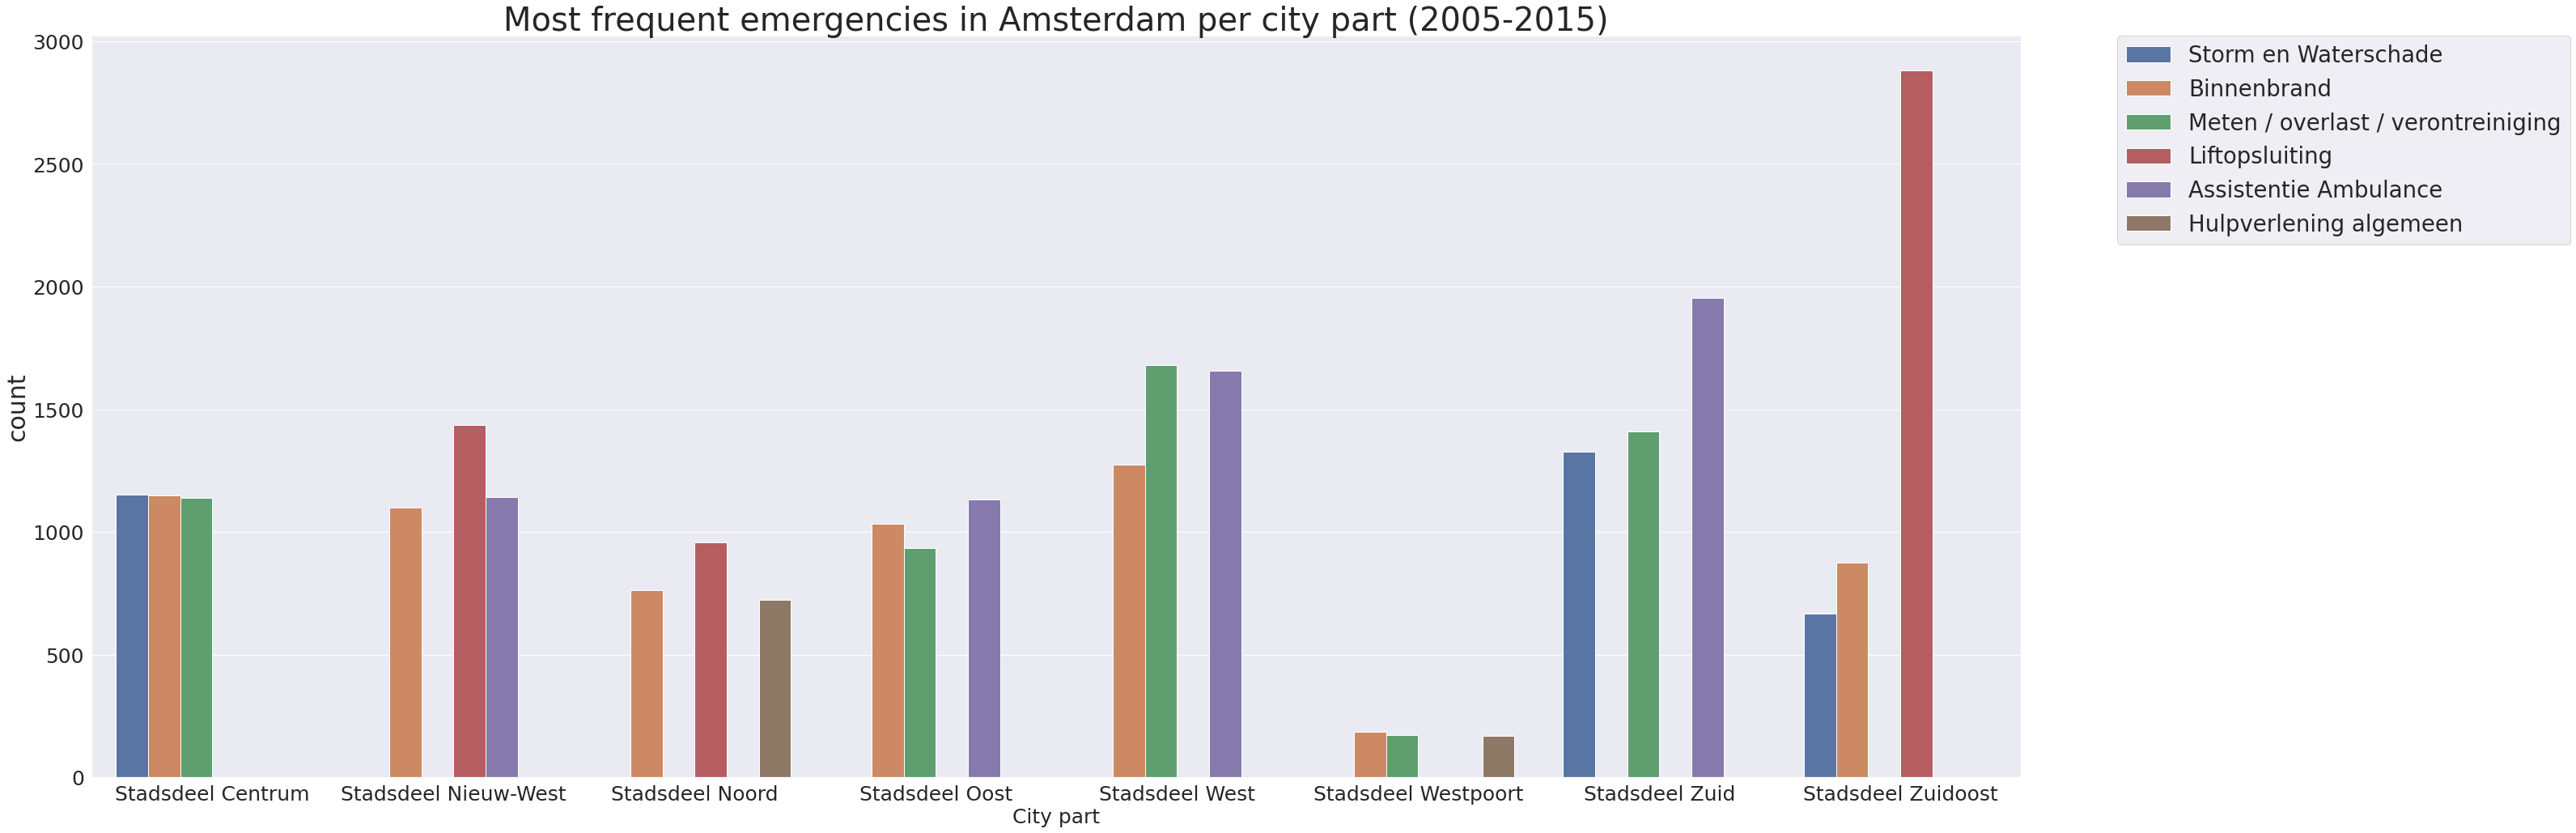

In [ ]:
# plot the top-3 incidents per city part without OMS and buitenbrand
plt.figure(figsize=(45,15))
sns.set(font_scale=2.5) 
z = zes.groupby('city part')['count'].nlargest(3).reset_index()
zes = zes.merge(z, on=['city part', 'count'], how ='inner')
probeer = sns.barplot(x='city part', y ='count', hue = 'incident type', data = zes)
probeer.axes.set_title("Most frequent emergencies in Amsterdam per city part (2005-2015)",fontsize=40)
probeer.set_xlabel("City part",fontsize=25)
city.set_ylabel("Number of incidents",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

#plt.savefig('probeer.png')

### **In story**
* Use this graph to indicate differences per city part
* OMS and outside fire is dominant across city and excluded from analysis
* Remarkable for Zuidoost elevator confinement 
* Westpoort has lowest number, but also lowest number of citizens - explain difference in story

 *Option for visualization:*

I intend to pitch this story to newspaper Het Parool. As the Saturday edition is in print, it is impossible to publish interactive maps. Therefore I focused on static graphs in Python, and did not use other tools such as Flourish. As a special feature, I could suggest to make an interactive map for the website of Het Parool, where TOP-3 incident types per city parts pop up, and when you hoover over the map data per neighborhood is specified. 

I tried to use example from class but I don't have longitude / latitude values. --> Search for other option, perhaps Flourish? 
 In case I need the geojson file of Amsterdam: 
 
 geo = pd.read_json('/mnt/My Drive/datajournalism/amsterdam.geojson.json')


## **4.2 Explanations**
In this section, I will look at possible explanations for differences in incidents per city part. 
1. WOZ
2. Population
3. Age distribution
4. Type of household 

**Explanation 1**: WOZ-value
---
How is the WOZ value related to the emergency notifications? 

---
First I had some problems with WOZ waarde that did not show in calculations. I tried specific codes to understand why WOZ didn't show up as numeric value. I first thought that something went wrong in the merging process. Later I understood that I needed to convert the data from string to integer. 

In [ ]:
# df.groupby(['city part']).describe() --> WOZ is missing

#west = df[df['city part'] == 'Stadsdeel West'] --> only look at West
#west.describe() --> still missing 

#westwoz = ['neighborhood','city part', 'WOZ'] --> shows that Stadsdeel West has more than 1 type of WOZ waarde, should be able to calculate mean?
#west[westwoz]
#westwoz.describe() --> doesn't work

In [ ]:
# WOZ need to be converted from string to integer
df.WOZ = pd.to_numeric(df.WOZ, errors='coerce')

In [ ]:
# calculate average WOZ-value per city part
df[['WOZ','city part']].groupby(
    'city part').agg(np.mean)

,WOZ
city part,
Stadsdeel Centrum,323.518094
Stadsdeel Nieuw-West,178.794110
Stadsdeel Noord,185.270445
Stadsdeel Oost,219.411317
Stadsdeel West,217.990298
Stadsdeel Westpoort,186.000000
Stadsdeel Zuid,330.224981
Stadsdeel Zuidoost,137.819326


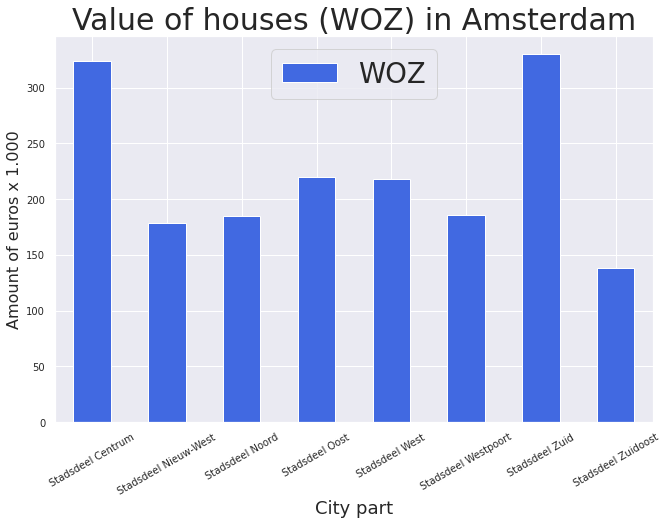

In [ ]:
# create bar graph WOZ per city part 
df[['WOZ','city part']].groupby(
    'city part').agg(np.mean).plot(kind='bar', figsize = [10,8], rot=30, fontsize=10, title='Value of houses (WOZ) in Amsterdam', color='royalblue')
plt.xlabel('City part', fontsize=18)
plt.ylabel('Amount of euros x 1.000', fontsize=16)
plt.rc('legend',fontsize=20)
plt.tight_layout()

plt.savefig('WOZ_amsterdam.png',dpi=400)

This graph shows the average WOZ-value per city part. The houses in the city center and the south are most expensive, the least expensive is the southeast. The other city parts are in between. 

### **In story**:
* This is average WOZ per city part. Note that there can be great variety within a city part. For example, some neighborhoods in the East are expensive, while others are cheaper to live. 
* Data is only 2015
* Connect WOZ to incidents --> lower WOZ, lower quality, more accidents?
* Keep in mind other explanations: for example building structure

**Explanation 2**: population
---
How is the population and number of incidents related?

___ 

Can I calculate the number of accidents per capita? Use column population and count of emergency calls in particular year (it turned out that this number is very small). I find it most important to show the reader that when the population is higher, the number of incidents is also higher. In the following section, I examine whether this is the case and if there are any specific factors that I need to take into account. 

In [ ]:
# Table shows that Noord has multiple neighborhoods but many duplicates 
df[df['city part']=='Stadsdeel Noord']

,incident type,niv1,niv2,niv3,year,month,day,day name,priority,hour,daypart,neighborhood,city part,population,amount 0-15y,amount 15-25,amount 25-45,amount 45-65,amount 65+,households total (amount),household oneperson,household nokids,household kids,WOZ,Before_2000,After_2000,Income average
772,Buitenbrand,Brand,Wegvervoer,,2012,10,13,Zondag,1,22,Avond,Buikslotermeer,Stadsdeel Noord,13175,2325,1760,3535,2910,2650,6490,3180,1405,1915,163.0,90,10,20.3
773,OMS / automatische melding,Brand,Aut.Alarm brand,.PAC melding brand,2008,12,28,Maandag,1,17,Middag,Buikslotermeer,Stadsdeel Noord,13175,2325,1760,3535,2910,2650,6490,3180,1405,1915,163.0,90,10,20.3
774,Hulpverlening algemeen,Dienstverlening,Algemeen dienst,Reinig wegdek Algemeen,2008,3,31,Dinsdag,2,19,Avond,Buikslotermeer,Stadsdeel Noord,13175,2325,1760,3535,2910,2650,6490,3180,1405,1915,163.0,90,10,20.3
775,Buitenbrand,Brand,Wegvervoer,,2012,5,19,Zondag,1,23,Avond,Buikslotermeer,Stadsdeel Noord,13175,2325,1760,3535,2910,2650,6490,3180,1405,1915,163.0,90,10,20.3
776,Reanimeren,Gezondheid,CPA gezondheid,AED Reanimatie CPA,2006,5,27,Zondag,1,10,Ochtend,Buikslotermeer,Stadsdeel Noord,13175,2325,1760,3535,2910,2650,6490,3180,1405,1915,163.0,90,10,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101629,Buitenbrand,Brand,Buitenbrand brand,Overig buitbr,2010,4,12,Dinsdag,1,23,Avond,Nieuwendammerdijk/Buiksloterdijk,Stadsdeel Noord,1700,420,145,340,560,245,655,170,185,305,385.0,95,5,34.1
101630,Buitenbrand,Brand,Buitenbrand brand,Overig buitbr,2011,1,16,Maandag,1,17,Middag,Nieuwendammerdijk/Buiksloterdijk,Stadsdeel Noord,1700,420,145,340,560,245,655,170,185,305,385.0,95,5,34.1
101631,Meten / overlast / verontreiniging,Dienstverlening,Onderzoek dienstverl,Metingen onderz,2010,4,5,Dinsdag,1,14,Middag,Nieuwendammerdijk/Buiksloterdijk,Stadsdeel Noord,1700,420,145,340,560,245,655,170,185,305,385.0,95,5,34.1
101632,Meten / overlast / verontreiniging,Dienstverlening,Brandweer,Meting,2014,3,8,Zondag,1,9,Ochtend,Nieuwendammerdijk/Buiksloterdijk,Stadsdeel Noord,1700,420,145,340,560,245,655,170,185,305,385.0,95,5,34.1


In [ ]:
# if I want to calculate the sum, I need to get rid of the duplicates 
dfnew=df[['city part', 'neighborhood', 'population']]
dfnew
dfnew=dfnew.drop_duplicates()
dfnew

,city part,neighborhood,population
0,Stadsdeel West,Kinkerbuurt,6195
772,Stadsdeel Noord,Buikslotermeer,13175
2602,Stadsdeel Zuid,Buitenveldert-Oost,7785
3715,Stadsdeel Zuid,Hoofddorppleinbuurt,11535
4783,Stadsdeel Noord,Nieuwendam-Noord,13050
...,...,...,...
100790,Stadsdeel Zuid,Duivelseiland,1360
100933,Stadsdeel Noord,Tuindorp Nieuwendam,3495
101220,Stadsdeel West,Sloterdijk,395
101281,Stadsdeel Nieuw-West,Lutkemeeren Ookmeer,845


In [ ]:
# groupby in new df
dfnew=dfnew.groupby('city part')['population'].agg('sum').reset_index()
dfnew

,city part,population
0,Stadsdeel Centrum,86350
1,Stadsdeel Nieuw-West,146540
2,Stadsdeel Noord,91260
3,Stadsdeel Oost,128575
4,Stadsdeel West,142600
5,Stadsdeel Westpoort,400
6,Stadsdeel Zuid,141365
7,Stadsdeel Zuidoost,84445


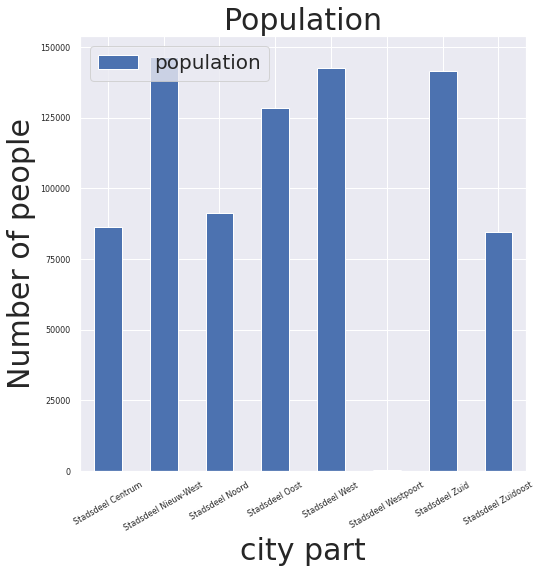

In [ ]:
# show table in a graph
dfnew[['population','city part']].groupby(
    'city part').agg('sum').plot(kind='bar', figsize = [8,8], rot=30, fontsize=8, title='Population', ylabel='Number of people')


Graph, based on data of 2015, shows population distribution over different city parts. West, Niew-West and Zuid have highest population, Southeast and city center lowest. Is this related to number of incidents? Check which city part is mentioned most in original dataset in the year 2014 (because data for 2015 is incomplete)

In [ ]:
# in those 10 years, fire department went (count) times to a particular city part
cc = df.groupby(['city part']).size().to_frame('count').reset_index()

In [ ]:
# in 2014, fire department went (count) times to a particular city part
veertien = df[df['year'] == 2014]
dd = veertien.groupby(['city part']).size().to_frame('count').reset_index()

In [ ]:
#merge to one df
merge = pd.merge(dfnew, dd, how='inner', left_on='city part', right_on='city part')

Do the number of incidents and number of citizens correspond? 

From table above: In 2014, 400 people lives in Westpoort, and there were 269 emergencies. In Centrum the population is almost 87.000, and the fire brigade has to come in action 1575 times. 


I thought of calculating incidents per capita (e.g. 1575/87.000 for Centrum), but this is such a small number that it does not say  much. Instead, I plotted the two variables to see if the fluctuation would tell me someting. It shows that when population is higher, the number of calls is also higher, and vice versa. Except for a greater distance between the lines for West and Center, the number of incidents is in line with population.

I need to work on the graph below to include it in my final story --> I don't understand why the color of the lines don't change. Also, a line graph is used to show change over time. This graph does not show indicate that because it is grouped by neighborhood. It would be better to change it to a bar graph that shows two different y-axes. 

In [ ]:
# Did not work, no numeric data to show?
#abc = pd.DataFrame({"city part": ["Stadsdeel Centrum","Nieuw-West","Noord","Oost","west","Westpoort","zuid","zuidoost"],
#                   "column1": [86350,146540,91260,128575,142600,400,141365, 84445], 
#                   "column2": [1575,1707,1077,1578,1483,269,1903,1116]})	

#ax = df.plot(x="city part", y="column1", legend=False)
#ax2 = ax.twinx()
#df.plot(x="city part", y="column2", ax=ax2, legend=False, color="r")
#ax.figure.legend()
#plt.show()

In [ ]:
# did not work: get two seperate graphs
#dfnew.plot(label="Points", legend=True)
#dd.plot(secondary_y=True, label="Comments", legend=True)

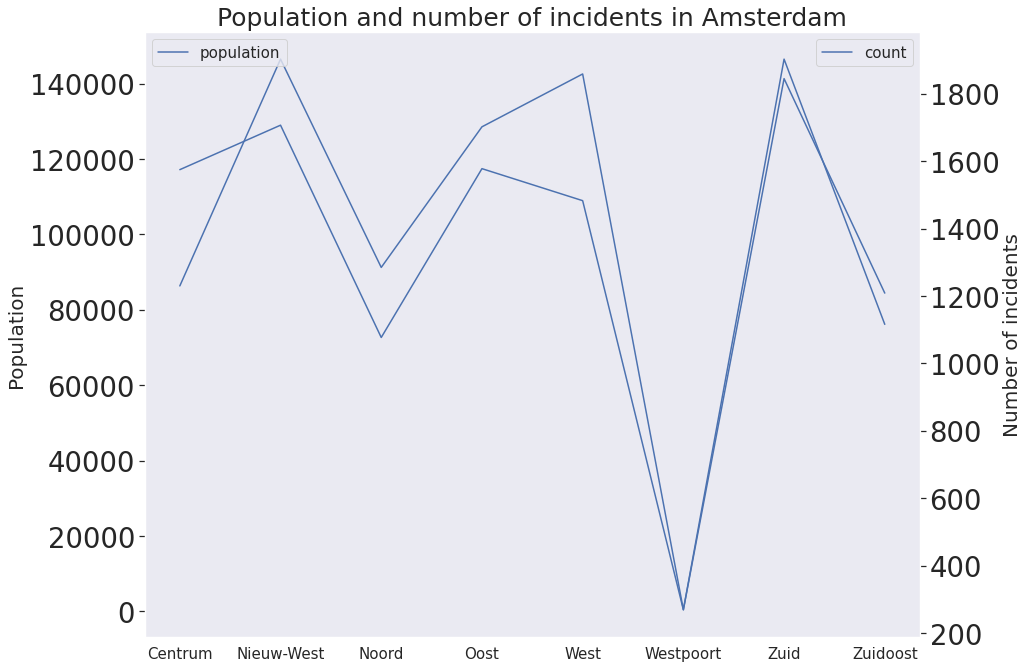

In [ ]:
# I'd need to work on this line graph --> I don't understand why the color of the lines don't change and why barplot doens't work
sns.set_style("dark")
plt.figure(figsize=(15,10))

merge1 = sns.lineplot(data=dfnew, color='firebrick')
ax2 = plt.twinx()
merge2 = sns.lineplot(data=dd, color="blue", ax=ax2)

merge1.set_xticklabels(['a','Centrum','Nieuw-West','Noord','Oost','West','Westpoort','Zuid','Zuidoost'],fontsize=15)
merge1.set_title("Population and number of incidents in Amsterdam", fontsize=25)
merge1.set_ylabel("Population",fontsize=20)
merge2.set_ylabel("Number of incidents",fontsize=20)


merge1.legend(loc="upper left", fontsize=15)
merge2.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig('combi_amsterdam.png')


### **Explanations by graph in story**

* I chose to include this graph in my story, because it reflects on population and number of incidents. 
* Before publication, I need to work on it (change it to bar graph, and change colors)

**Explanation 3**: age distribution
---
How is the age distribution or household type related to the emergency notifications? 

---

In the following section, the age distribution per city part is examined. Are there specific neighborhoods with a high percentage of childeren/ elderly, and is that linked to type or number of incidents? 

In [ ]:
# create dataframe with age and city part
age_columns = ['amount 0-15y','amount 15-25','amount 25-45','amount 45-65','amount 65+', 'city part', 'neighborhood']
df[age_columns]

,amount 0-15y,amount 15-25,amount 25-45,amount 45-65,amount 65+,city part,neighborhood
0,610,735,2940,1480,440,Stadsdeel West,Kinkerbuurt
1,610,735,2940,1480,440,Stadsdeel West,Kinkerbuurt
2,610,735,2940,1480,440,Stadsdeel West,Kinkerbuurt
3,610,735,2940,1480,440,Stadsdeel West,Kinkerbuurt
4,610,735,2940,1480,440,Stadsdeel West,Kinkerbuurt
...,...,...,...,...,...,...,...
101629,420,145,340,560,245,Stadsdeel Noord,Nieuwendammerdijk/Buiksloterdijk
101630,420,145,340,560,245,Stadsdeel Noord,Nieuwendammerdijk/Buiksloterdijk
101631,420,145,340,560,245,Stadsdeel Noord,Nieuwendammerdijk/Buiksloterdijk
101632,420,145,340,560,245,Stadsdeel Noord,Nieuwendammerdijk/Buiksloterdijk


In [ ]:
# describe to get mean etc
df[age_columns].groupby(['city part']).describe()

amount 0-15y               ... amount 65+        
                            count         mean  ...        75%     max
city part                                       ...                   
Stadsdeel Centrum         14673.0   861.349417  ...     1365.0  2775.0
Stadsdeel Nieuw-West      15570.0  2484.465318  ...     2000.0  3280.0
Stadsdeel Noord           11274.0  1734.344953  ...     2210.0  2650.0
Stadsdeel Oost            14315.0  1626.983584  ...     1265.0  1585.0
Stadsdeel West            15048.0  1398.247608  ...     1050.0  1420.0
Stadsdeel Westpoort        2549.0    12.883484  ...       20.0    20.0
Stadsdeel Zuid            16837.0  1356.489577  ...     2140.0  3340.0
Stadsdeel Zuidoost        11368.0  3438.442118  ...     2905.0  2905.0

[8 rows x 40 columns]

Below I've created a graph that shows the age distribution per city part. Can this explain what type of incidents happen? For example (not based on actual data): In Zuidoost, fire fighters are called most often to free someone from elevator, and the largest share in age distribution in Zuidoost is 65+.

Text(0.5, 1.0, 'Age distribution per Amsterdam city part')

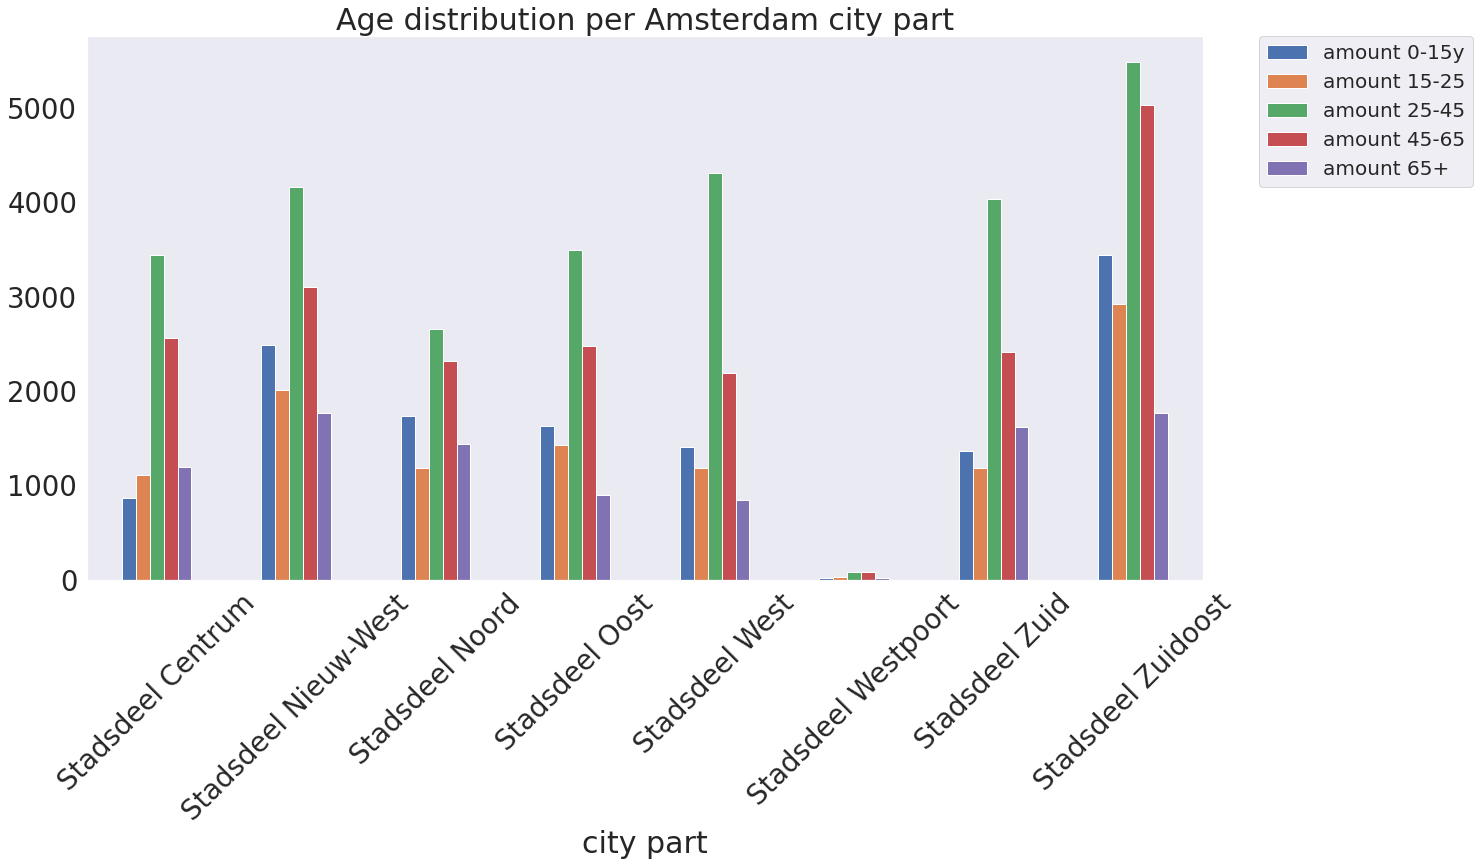

In [ ]:
age = df[['amount 0-15y','amount 15-25','amount 25-45','amount 45-65','amount 65+','city part']].groupby(
    'city part').agg(np.mean).plot(kind='bar', figsize=[20,10], rot=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
age.set_title('Age distribution per Amsterdam city part')

This bar graph doesn't really show what I want, because it shows the mean. Westpoort is an industrial neighborhood and not many people live there, whereas Zuidoost has the highest number of residents thus absolute amount is highest. Instead I want it proportional, to be able to say: relatively speaking the share of 65+ in Noord is biggest

--> I need to create a pie chart per region to show this.

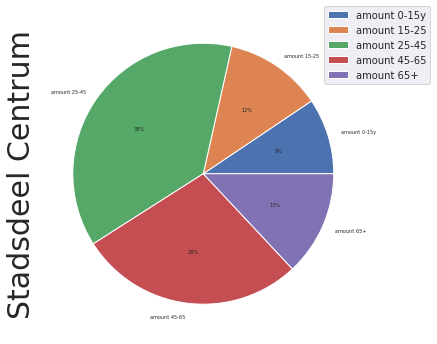

In [ ]:
# Preparing the data frame
data1 = df[df['city part'] == 'Stadsdeel Centrum']

# Pivoting the data frame for the plot
data1_pivot = data1.pivot_table(values=['amount 0-15y', 'amount 15-25', 'amount 25-45', 'amount 45-65', 'amount 65+'], columns='city part', aggfunc=np.sum)

# Plotting a pie chart
plot = data1_pivot.plot.pie(y='Stadsdeel Centrum', figsize=(6,6), autopct='%1.f%%', fontsize=5)

# move legend
plt.legend(bbox_to_anchor=(1.05,0.8), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

#plt.pie(values, labels=labels, autopct='%.2f')
#plt.show()

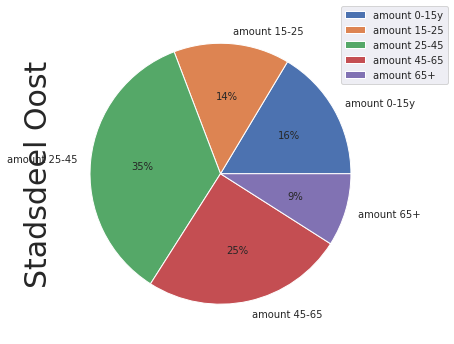

In [ ]:
data1 = df[df['city part'] == 'Stadsdeel Oost']
data1_pivot = data1.pivot_table(values=['amount 0-15y', 'amount 15-25', 'amount 25-45', 'amount 45-65', 'amount 65+'], columns='city part', aggfunc=np.sum)
plot = data1_pivot.plot.pie(y='Stadsdeel Oost', figsize=(6,6), autopct='%1.f%%', fontsize=10)
plt.legend(bbox_to_anchor=(1.05,0.8), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

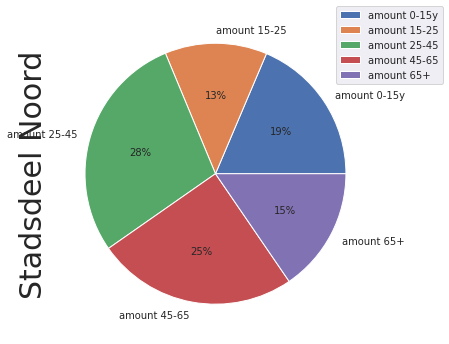

In [ ]:
data1 = df[df['city part'] == 'Stadsdeel Noord']
data1_pivot = data1.pivot_table(values=['amount 0-15y', 'amount 15-25', 'amount 25-45', 'amount 45-65', 'amount 65+'], columns='city part', aggfunc=np.sum)
plot = data1_pivot.plot.pie(y='Stadsdeel Noord', figsize=(6,6), autopct='%1.f%%', fontsize=10)
plt.legend(bbox_to_anchor=(1.05,0.8), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

I created pie charts for every city part, but then found out that it is difficult to read because the differences in percentages are so small between city parts. Instead of several pie charts, I made a stacked bar chart. 

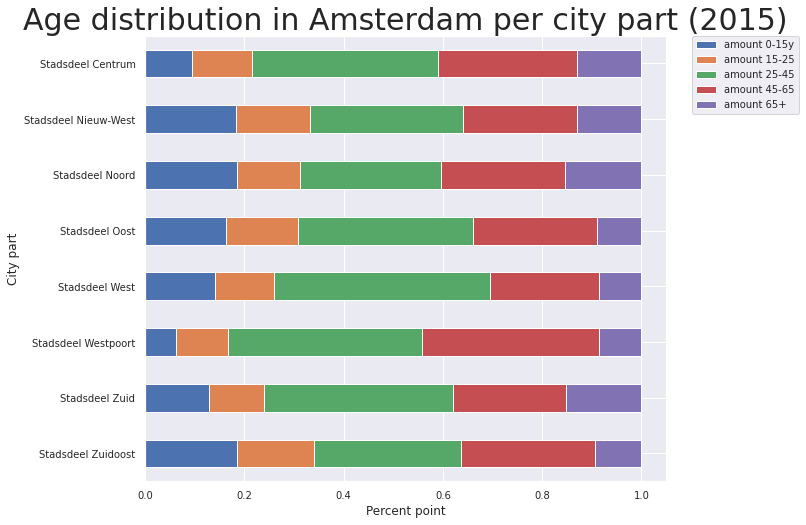

In [ ]:
# stacked bar chart
plt.rcParams['figure.figsize'] = (12,8)
sns.set_style("darkgrid")
lft = df.pivot_table(values=['amount 0-15y', 'amount 15-25', 'amount 25-45', 'amount 45-65', 'amount 65+'], 
                      index='city part',
                      aggfunc='sum')

lft = lft.div(lft.sum(1), axis=0)
lft.plot(kind='barh', stacked=True).set(title="Age distribution in Amsterdam per city part (2015)")
plt.xlabel('Percent point', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()
plt.ylabel('City part', fontsize=12)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)
plt.tight_layout()
plt.savefig('age_amsterdam.png',dpi=400)

### **In story**

* The bar chart doesn't give a big difference in age distribution, so the  age groups in Amsterdam population are spread quite evenly over the city. 
* 25-45 is largest share in all city parts
* Zuid and Noord have highest share of 65+
* Zuidoost, Nieuw-West, Noord largest share of children
* Westpoort and Centrum lowest share of children
* Do incidents related to age happen more/ less in a particular neighborhood? It cannot explain much, because age distribution is spread so evenly. 

**Explanation 4**: type of households
---

How is type of household related to number/ type of incidents?

--- 
Linked to the age distribution above, this sections analyses different household types in the city. 


In [ ]:
# select types of household
household = df[['household oneperson','household nokids', 'household kids','households total (amount)','city part']]
household.groupby(['city part']).describe()

household oneperson               ... households total (amount)         
                                   count         mean  ...                       75%      max
city part                                              ...                                   
Stadsdeel Centrum                14673.0  3951.424385  ...                    6330.0  13020.0
Stadsdeel Nieuw-West             15570.0  3054.937058  ...                    8240.0   8565.0
Stadsdeel Noord                  11274.0  2052.173142  ...                    6135.0   6490.0
Stadsdeel Oost                   14315.0  2908.201537  ...                    7115.0   9035.0
Stadsdeel West                   15048.0  3415.308014  ...                    7470.0  10220.0
Stadsdeel Westpoort               2549.0   115.766967  ...                     145.0    145.0
Stadsdeel Zuid                   16837.0  3741.612223  ...                    8160.0  10015.0
Stadsdeel Zuidoost               11368.0  5255.445549  ...                   13935.0  13935.0

[8 rows x 32 columns]

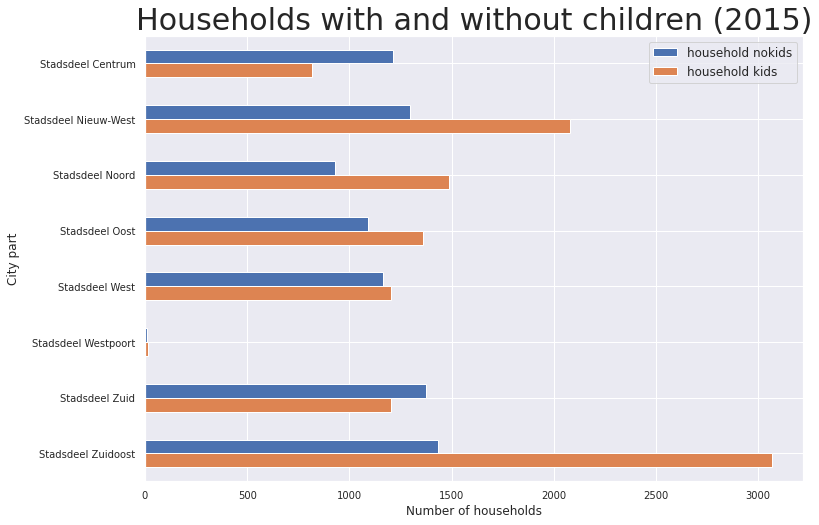

In [ ]:
# plot household with and without kids --> household oneperson is excluded from analysis 
household = df[['household nokids', 'household kids','city part']].groupby(
    'city part').agg(np.mean).plot(kind='barh').set(title="Households with and without children (2015)")
plt.xlabel('Number of households', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()
plt.legend(fontsize=12)
plt.ylabel('City part', fontsize=12)
plt.tight_layout()

#plt.savefig('household_ams')

I will not use this graph in my story because it doesn't add a more valuable explanation than age distribution. 
* Oneperson household excluded from analysis. Is highest in every neighborhood. Including it in the graph would make difference kids/nokids less clear. 
* Based on this data, seems that city part Noord and Zuid have largest share of elderly population (15% is 65+). Does that have an effect on incident type? Above we saw these city parts don't have remarkable values (such as elevator for Southeast), and digging deeper into the data it shows that incidents you might expect (reanimeren, hulpverlening, ambulance) are not more prevalent there. 

Check whether the incidents you might expect with elderly/kids, are most prevalent in particular neighborhood? 

In [ ]:
# for elderly
reanimeren = df[df['incident type'] == 'Reanimeren']
rnm = reanimeren['city part'].value_counts().nlargest(10)

ambu = df[df['incident type'] == 'Assistentie Ambulance']
ambu = ambu['city part'].value_counts().nlargest(10)
ambu

Stadsdeel Zuid          1954
Stadsdeel West          1658
Stadsdeel Nieuw-West    1141
Stadsdeel Centrum       1134
Stadsdeel Oost          1133
Stadsdeel Noord          629
Stadsdeel Zuidoost       415
Stadsdeel Westpoort       40
Name: city part, dtype: int64

In [ ]:
# for children 
#entrapment
beknel = df[df['incident type'] == 'Beknelling / bevrijding']
beknel = beknel['city part'].value_counts().nlargest(10)
beknel

#animal in water
dier = df[df['incident type'] == 'Dier te water']
dier = dier['city part'].value_counts().nlargest(10) 

#person in water
persoon = df[df['incident type'] == 'Persoon te water']
persoon = persoon['city part'].value_counts().nlargest(10)

#vehicle in water
vehicle = df[df['incident type'] == 'Voertuig te water']
vehicle = vehicle['city part'].value_counts().nlargest(10)

Stadsdeel Noord         273
Stadsdeel Zuidoost       85
Stadsdeel Nieuw-West     59
Stadsdeel Oost           38
Stadsdeel Centrum        38
Stadsdeel Zuid           36
Stadsdeel West           22
Stadsdeel Westpoort       6
Name: city part, dtype: int64

**Based on data per incident: **

* entrapment in Nieuw-West and Oost, lowest in Centrum 
* person in water most often in Centrum --> tourists? 
* CPR highest in Nieuw-West, Zuid and Centrum 
* Ambulance services in Zuid and West --> also bigger hospitals in those regions
* Animal in water highest in Noord --> can have different explanations: more families with childeren, more water, farmlands also part of it? 

Below I looked at top-10 incidents per city part. 

In [ ]:
noord_df = df[df['city part'] == 'Stadsdeel Noord']
noord_df

nrd = noord_df['incident type'].value_counts().nlargest(10)
nrd

Buitenbrand                           2602
Liftopsluiting                         957
OMS / automatische melding             910
Binnenbrand                            762
Hulpverlening algemeen                 722
Meten / overlast / verontreiniging     717
Storm en Waterschade                   689
Reanimeren                             682
Assistentie Ambulance                  629
Assistentie Politie                    583
Name: incident type, dtype: int64

In [ ]:
# also check for other city parts 
zo_df = df[df['city part'] == 'Stadsdeel Zuidoost']
zo = zo_df['incident type'].value_counts().nlargest(10)

nw_df = df[df['city part'] == 'Stadsdeel Nieuw-West']
nw = nw_df['incident type'].value_counts().nlargest(10)

z_df = df[df['city part'] == 'Stadsdeel Zuid']
z = z_df['incident type'].value_counts().nlargest(10)

Based on the data per city part:

### **Explanation by data in story:**
* Most incidents are not related to age (such as in- or outside fire, water damage, OMS)
* CPR in top 10 for Noord, Zuidoost, Nieuw West, Centrum --> Zuidoost has high share of children 
* Fire department works together with other emergency services: in almost all city parts the fire brigade gives assistance to ambulance or police. But fire brigade also provides general aid without ambulance or police. 


## **Remarkable**: Zuidoost has liftopsluiting most often

It stood out that most frequent emergency in Zuidoost was elevator confinement. This could be interesting to combine with age distribution data --> do more elderly people live there for example? 

Other factors: the houses in the city center usually don't have elevators, whereas Zuidoost has a lot of apartment buildings. 

In [ ]:
# closer look at liftopsluiting 
lift_df = df[df['incident type'] == 'Liftopsluiting']
lift_dff = lift_df[lift_df['city part'] == 'Stadsdeel Zuidoost']

In [ ]:
# look at days of the week
lift = lift_dff.groupby(['city part','day name']).size().to_frame('count').reset_index()

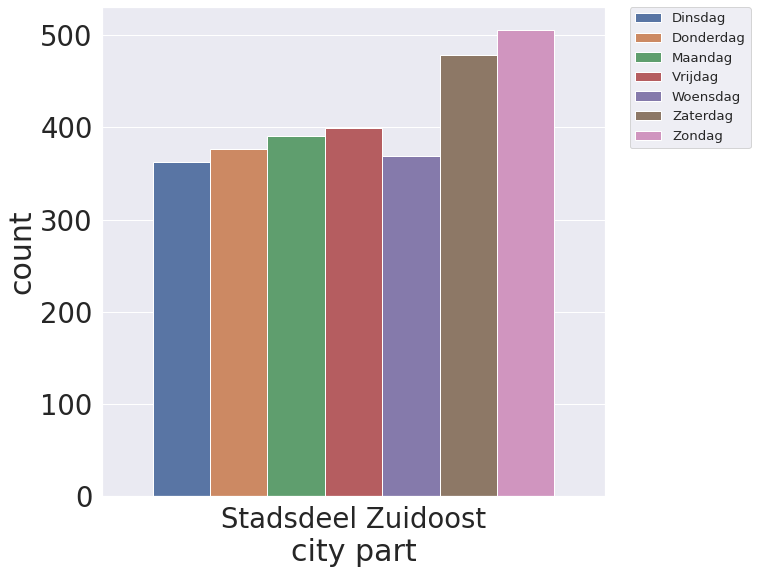

In [ ]:
# Saturday and Sunday are the worst days to take the elevantor, highest change to get stuck
# Explanation: on the weekends most people take the elevantor, on Wednesday and monday least. 
# does this graph show total over 10 years, or average per year?
plt.figure(figsize=(9,9))
sns.barplot(x='city part', y='count', data=lift, hue='day name')
sns.set(font_scale=1.2) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


In [ ]:
# just looked which day is most unfortunate to take elevator, what about the time?
hour = lift_dff.groupby(['city part','hour']).size().to_frame('count').reset_index()

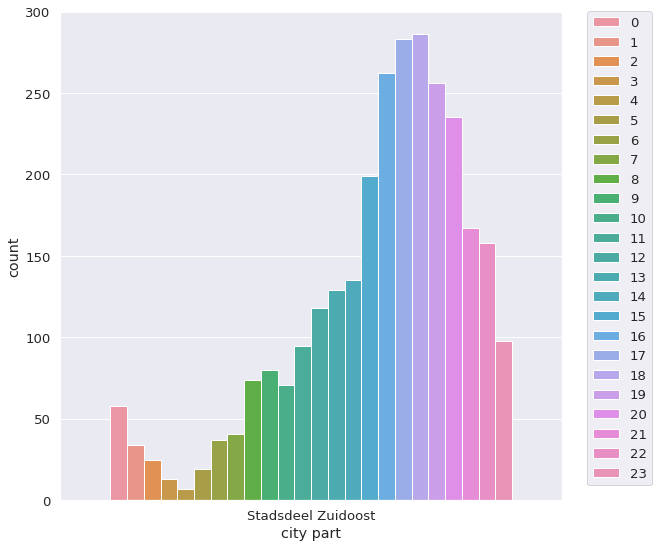

In [ ]:
# This graph is too messy --> Change it to a linegraph! 
# Then you can see that most people get stuck in an evevator towards the end of the day, e.g. after work
plt.figure(figsize=(9,9))
sns.barplot(x='city part', y='count', data=hour, hue='hour')
sns.set(font_scale=1.2) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Instead of only Zuidoost, interested in all regions of the city and when people get stuck in elevator. Shows that it is often after working hours, around 6pm. 

In [ ]:
# info about all of Amsterdam
lift_test = df[df['incident type'] == 'Liftopsluiting']
hour_test = lift_test.groupby(['city part','hour']).size().to_frame('count').reset_index()

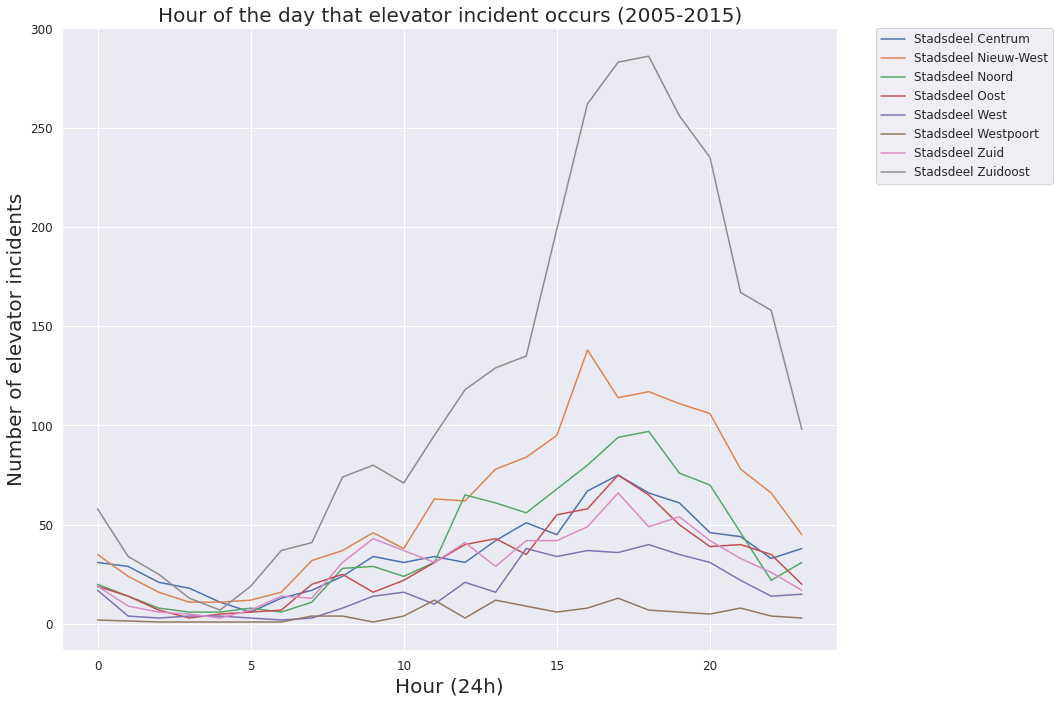

In [ ]:
#time when people get stuck in the elevator
plt.figure(figsize=(15,10))
lift = sns.lineplot(x='hour', y='count', data=hour_test, hue='city part')
#lift.set_title('Hour of the day that elevator incident occurs 2005-2015')

lift.axes.set_title("Hour of the day that elevator incident occurs (2005-2015)",fontsize=20)
lift.set_xlabel("Hour (24h)",fontsize=20)
lift.set_ylabel("Number of elevator incidents",fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.savefig('lift.png',dpi=400)


This graph shows that most incidents happen after working hours. I will not use this graph in my story because I choose another focus. 


## **The end!** 

This was the notebook used to create a story about the Amsterdam fire fighters. Thanks for reading!